# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [29]:
import pandas as pd
!pip install palmerpenguins
from palmerpenguins import load_penguins
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from plotnine import *

In [9]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [11]:
penguins = penguins.dropna()

y = penguins["bill_depth_mm"]
X = penguins.drop(columns=["bill_depth_mm"])

cat_cols = X.select_dtypes(include="object").columns.tolist()
num_cols = X.select_dtypes(exclude="object").columns.tolist()

ct = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop="first"), cat_cols)])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

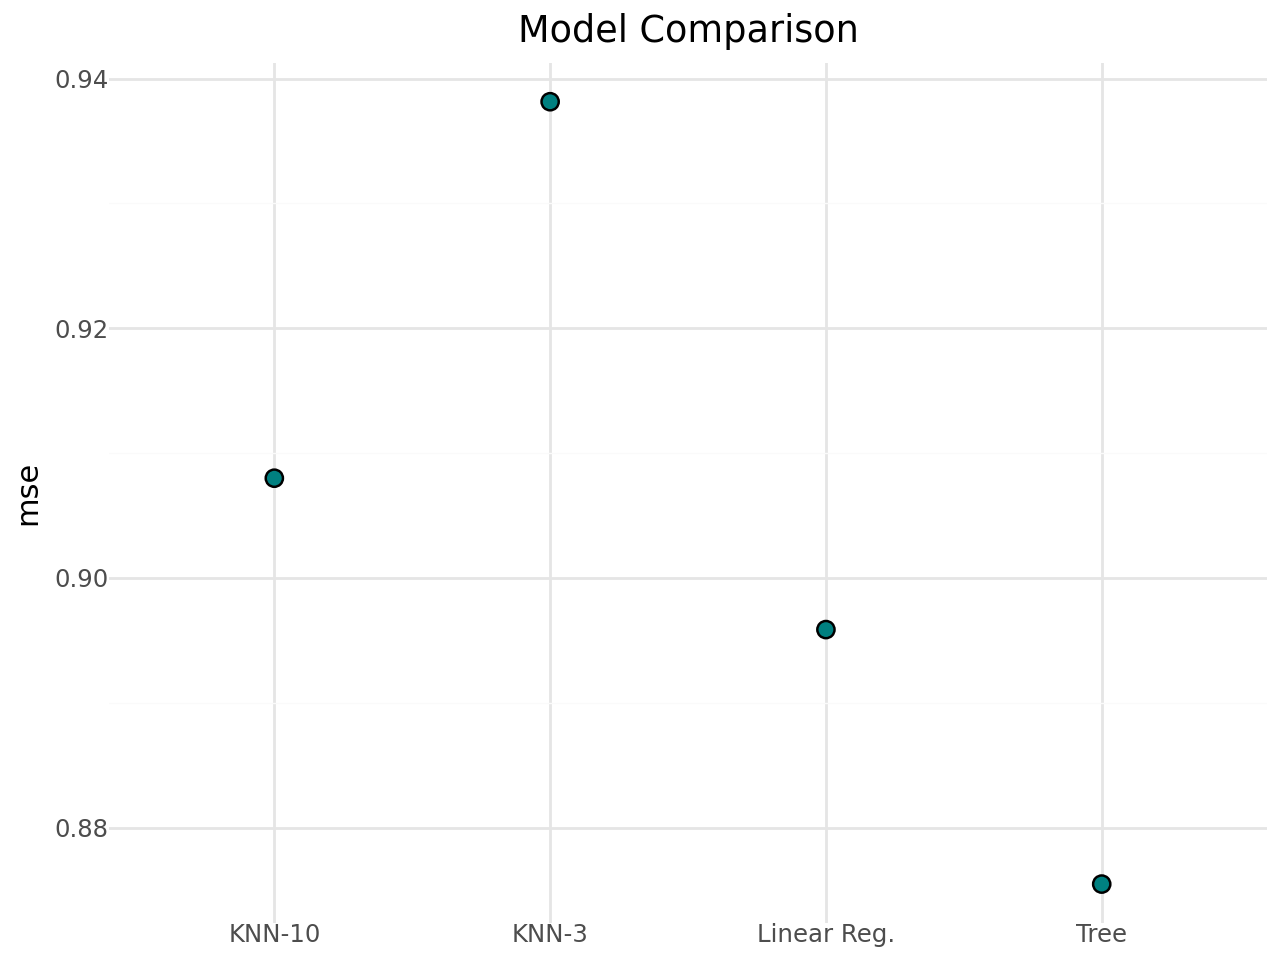

In [28]:
#linear
lr_model = Pipeline([
    ("prep", ct), ("lr", LinearRegression())])
lr_model.fit(X_train, y_train)
lr_train = mean_squared_error(y_train, lr_model.predict(X_train))
lr_test = mean_squared_error(y_test, lr_model.predict(X_test))

#KNN (3)
knn3 = Pipeline([
    ("prep", ct), ("knn", KNeighborsRegressor(n_neighbors=3))])
knn3.fit(X_train, y_train)
knn3_train = mean_squared_error(y_train, knn3.predict(X_train))
knn3_test = mean_squared_error(y_test, knn3.predict(X_test))

#KNN (10)
knn10 = Pipeline([
    ("prep", ct), ("knn", KNeighborsRegressor(n_neighbors=10))])
knn10.fit(X_train, y_train)
knn10_train = mean_squared_error(y_train, knn10.predict(X_train))
knn10_test = mean_squared_error(y_test, knn10.predict(X_test))

#Decision tree
tree = Pipeline([
    ("prep", ct), ("tree", DecisionTreeRegressor(max_depth=4, random_state=42))])
tree.fit(X_train, y_train)
tree_train = mean_squared_error(y_train, tree.predict(X_train))
tree_test = mean_squared_error(y_test, tree.predict(X_test))

lr_model.fit(X, y)
knn3.fit(X, y)
knn10.fit(X, y)
tree.fit(X, y)

train_errors = [lr_train, knn3_train, knn10_train, tree_train]
test_errors = [lr_test, knn3_test, knn10_test, tree_test]
labels = ["Linear Reg.", "KNN-3", "KNN-10", "Tree"]

#plotting
plot_df = pd.DataFrame({
    "model": ["Linear Reg.", "KNN-3", "KNN-10", "Tree"],
    "mse": [lr_test, knn3_test, knn10_test, tree_test]})

(ggplot(plot_df, aes(x="model", y="mse"))
    + geom_point(fill = "teal", size=3)
    + labs(y="mse", x="", title="Model Comparison")
    + theme_minimal())


The Decision Tree had the lowesst MSE and therefore is the best. It has the most accurate predictions for bill mm depth.